# Levenshtein

### Instructions
- Make the listed exercises BY HAND to practice computing with Dynamic Programming
- Check your results with the results presented later in this notebook
- You may skip the pencil and paper work for exercises that you really feel comfortable with (but don't overestimate yourself)

### Exercises

##### Exercise 1: Computing the Levenshtein Distance

- What is the Levenshtein Distance between following word pairs? 
     + (*word* vs *words*), (*word* vs *order*), (*#word* vs *#order*)
- Did you need to calculate in a trellis or did you use an intuitive approach ?  Explain how this intuitive approach worked ?
- Look at the results for cases 2 and 3 in this notebook. At first sight you expect The Levenshtein distance in cases 2 and 3 to be identical (one extra match in the latter case). However, the software doesn't yield the same answer:
    + is there a bug in the software, or are there subtle differences that need extra attention ?
        - label the transitions as MATCH/SUBSTITION/INSERTION/DELETION to support your reasoning
    + which of the two answers would you label correct

##### Exercise 2: Character vs. Word Distance
- What is the Levenshtein Distance between following utterances ?  
    + "recognize speech" vs.  "wreck a nice beach"
- INSTRUCTIONS:
    + There is NO NEED to compute the full trellis.  This will save time , but explain also how and why you did the 'shortcut' !!
    + Solve the above for both  "character distance" and "word distance"
    + Find the optimal character alignment between both utterances
    + Is the DTW distance unique ? and does this correspond to a unique alignment ?
    + Are there multiple equivalent alignments possible ?

##### Exercise 3: Error Rate Computations for Speech Recognition
- You are given a small corpus with *reference*-transcription and *observation* results from a speech recognition experiment.
- What is the WORD error rate of your system for the given corpus ?

    + ref1="fauchelevent limped along behind the horse in a very contented frame of mind "
    + obs1 = "lochleven limped along behind the heard in very contented frame of mind"
    + ref2= " he would have loved to be king in such a non nonsense paradise "
    + obs2=" he had loved the king in a no sense paradigm"
    + ref3 = "do you know the names of the seven dwarfs in Disney’s Snow White movie ?"
    + obs3 =  "do you know the names of the seven warfs in the sneaze now white movie ?"

In [1]:
#!pip install git+https://github.com/compi1234/pyspch.git
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
# do all the imports
%matplotlib inline
import sys, os
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pyspch.dtw as dtw

### Software
We use the **dtw** module available in pyspch.  This module was primarily developed for dtw between continuous vectors,
but with the proper parameters is equally suited for string matching.   

Results include the *distance* and the *alignment(trace)* as well as local and global distance matrices and backpointers.
Transitions are defined by their backpointers.  While not strongly imposed in the package it is sometimes implied that:
X is an input/test/hypothesis/observation while Y is the reference.  Under that agreement
horizontal transitions correspond to INSERTIONS and Vertical transitions correspond to DELETIONS.

Using the **dtw()** module in string matching mode, involves:  
- using  p = 'hamming' : to specify an atomic local distance between (X,Y) , i.e.  '0' if X==Y  and '1' if X!=Y
- converting strings to np.array's prior to passing to the dtw() module ; it is in this preparation step that you choose between tokenization at character, word or some other level




##### evalign package
There exists a companion notebook Levenshtein1_eva.ipynb that uses the evalign package as an alternative.
It is more specific to string operations than *dtw*, but also comes with more whistles and bells.

### Exercise 1

In order to compute the Levenshtein distance between elements of a sequence (characters in this case), we specify
- trans = "LEV" : to allow for Levenshtein transitions corresponding to Deletions, Insertions and Substitutions
- result = 'details'  makes the module return all relevant computational results


Levenshtein Distance (['w' 'o' 'r' 'd'] vs ['w' 'o' 'r' 'd' 's']):  1 
Alignment    0  1  2  3  4
x  w  o  r  d  d
y  w  o  r  d  s


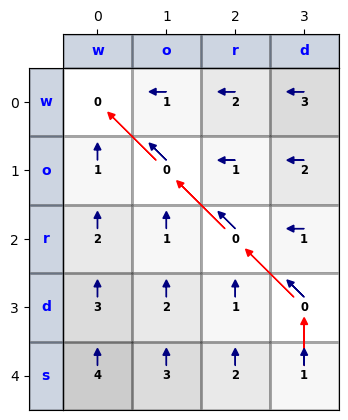

Levenshtein Distance (['w' 'o' 'r' 'd'] vs ['o' 'r' 'd' 'e' 'r']):  4 
Alignment    0  1  2  3  4  5
x  w  o  r  d  d  d
y  o  o  r  d  e  r


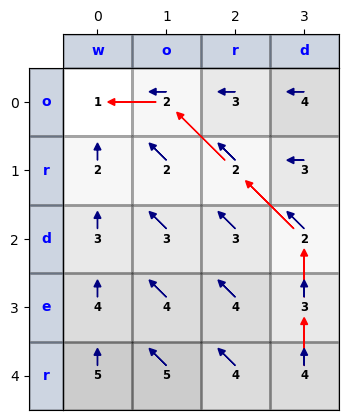

Levenshtein Distance (['#' 'w' 'o' 'r' 'd'] vs ['#' 'o' 'r' 'd' 'e' 'r']):  3 
Alignment    0  1  2  3  4  5  6
x  #  w  o  r  d  d  d
y  #  #  o  r  d  e  r


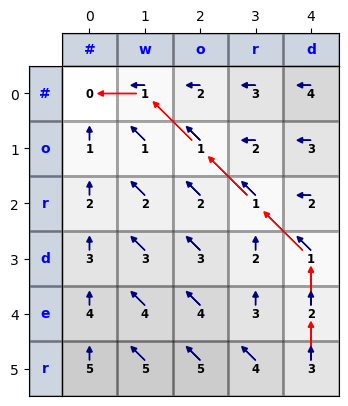

In [3]:
plt_args = {'ftr_scale':.1,'xy_annot':True,'fig_width':4.,
            'xy_args':{'cmap':'Greys','alpha':.2,'text_size':'small','fontweight':'bold','fmt':'{:.0f}'},
            'ftr_args':{'alpha':.2,'cmap':'Blues','text_color':'b','fontweight':'bold'}}
xlist = ["word","word","#word"]
ylist = ["words","order","#order"]
for xx,yy in zip(xlist,ylist):
    x = np.array(list(xx))
    y = np.array(list(yy))
    lev_dist,trace,ld,cd,bptrs = dtw.dtw(x,y,trans="LEV",p='hamming',result='details')
    print("Levenshtein Distance (%s vs %s):  %d " %(x,y,lev_dist))
    print("Alignment",dtw.align(x,y,trace).T)
    display(dtw.plot_trellis(x=x,y=y,xy_mat=cd,trace=trace,bptrs=bptrs,**plt_args))

### Exercise 2

- we make 2 different "tokenizations" from the input text strings
    + once as list of characters
    + once as list of words
- in order to make the DTW suitable for initial insertion/deletion we add a dummy EPSILON symbol at the start of both sequences

In [4]:
utt1 = "recognize speech"
utt2 = "wreck a nice beach"
# convert strings to lists of characters
x = np.append("#",list(utt1))
y = np.append("#",list(utt2))
print("Comparing CHARACTER sequences:\n ", x,"\nand\n",y)
char_dist,_ = dtw.dtw(x,y,trans="LEV",p='hamming')
print("Levenshtein Distance:  %d " %(char_dist))
# convert strings to lists of words
x = np.append("#",utt1.split())
y = np.append("#",utt2.split())
print("\n")
print("Comparing WORD sequences:\n ", x,"\nand\n",y)
word_dist,_ = dtw.dtw(x,y,trans="LEV",p='hamming')
print("Levenshtein Distance :  %d " %(word_dist))

Comparing CHARACTER sequences:
  ['#' 'r' 'e' 'c' 'o' 'g' 'n' 'i' 'z' 'e' ' ' 's' 'p' 'e' 'e' 'c' 'h'] 
and
 ['#' 'w' 'r' 'e' 'c' 'k' ' ' 'a' ' ' 'n' 'i' 'c' 'e' ' ' 'b' 'e' 'a' 'c'
 'h']
Levenshtein Distance:  9 


Comparing WORD sequences:
  ['#' 'recognize' 'speech'] 
and
 ['#' 'wreck' 'a' 'nice' 'beach']
Levenshtein Distance :  4 


#### Plots
In the cells below we give a detailed view of the "global distance matrix" and also a side-by-side plot of local and global matrices.

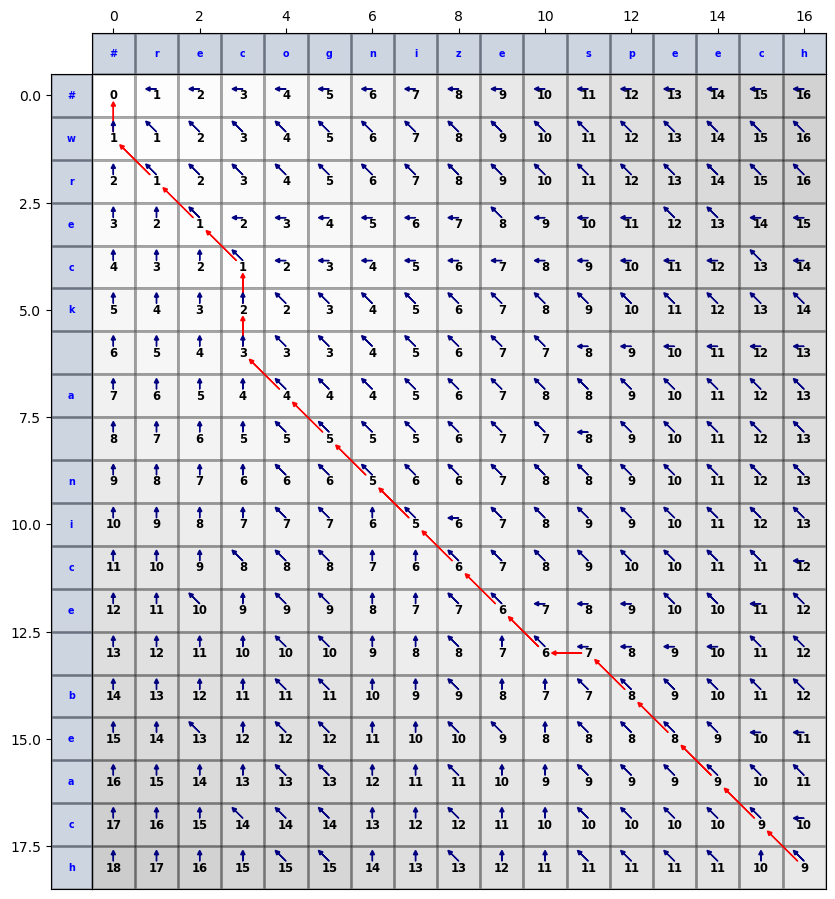

In [5]:
x = np.append("#",list(utt1))
y = np.append("#",list(utt2))
dist,trace,ld_matrix,cd_matrix,bptrs = dtw.dtw(x,y,trans="LEV",p='hamming',result='details')
plt_args = {'ftr_scale':.05,'xy_annot':True,
            'xy_args':{'cmap':'Greys','alpha':.2,'text_size':'small','fontweight':'bold','fmt':'{:.0f}'},
            'ftr_args':{'alpha':.2,'cmap':'Blues','text_color':'b','fontweight':'bold'}}
fig1 = dtw.plot_trellis(x=x,y=y,xy_mat=cd_matrix,bptrs=bptrs,trace=trace,**plt_args)
display(fig1)

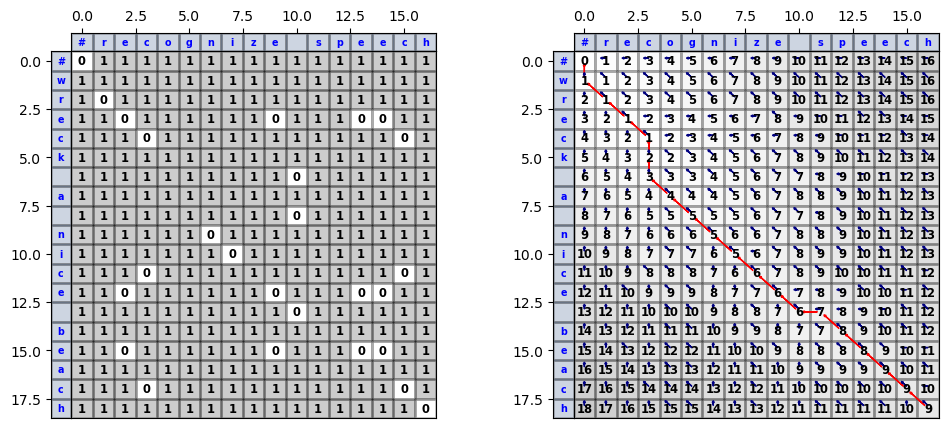

In [6]:
fig2 = dtw.plot_trellis2(x,y,left=ld_matrix,right=cd_matrix,bptrs=bptrs,trace=trace,**plt_args)
display(fig2)

In [7]:
x = np.append("#",list(utt1))
y = np.append("#",list(utt2))
char_dist,trace = dtw.dtw(x,y,trans="LEV",p='hamming')
print("character distance: ",char_dist)
display(dtw.align(x,y,trace[1:,:]).T) 

character distance:  9.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
x,#,r,e,c,c,c,o,g,n,i,z,e,,s,p,e,e,c,h
y,w,r,e,c,k,,a,,n,i,c,e,,,b,e,a,c,h


### Exercise 3:  Error Rate computation in a speech recognition experiment

In this example we compute the Levenshtein distance which can be converted to a word/character error rate by dividing by the number of characters in the reference transcription.

In speech recognition we will often split out the errors into: Substitutions, Insertions and Deletions.
This is easily done by looking at the alginment.

In [8]:
def score_corpus(corpus):
    Ntot = 0.
    Nref = 0.
    for [reference,result] in corpus:
        ref = np.append("#",reference.split())
        hyp = np.append("#",result.split())
        dist, trace = dtw.dtw(hyp,ref,p='hamming')

        display(dtw.align(hyp,ref,trace[1:,:]).T)  #drop dummy symbols in output
        print("Errors: ",dist)            
        Ntot += dist
        Nref += (len(ref)-1)  # subtract one for the dummy symbol
        
    print("\n ++ CORPUS RESULTS ++ ")
    print("Words in corpus: %d" % Nref)
    print("Error Rate: %5.2f%%" % ((100.*Ntot)/Nref)  )

In [9]:
ref1="fauchelevent limped along behind the horse in a very contented frame of mind "
obs1 = "lochleven limped along behind the heard in very contented frame of mind"

ref2= " he would have loved to be king in such a non nonsense paradise "
obs2=" he had loved the king in a no sense paradigm"

ref3 = "do you know the names of the seven dwarfs in Disney’s Snow White movie ?"
obs3 =  "do you know the names of the seven warfs in the sneaze now white movie ?"

In [10]:
# corpus scoring routine
corpus = [ [ref1,obs1], [ref2,obs2], [ref3,obs3] ]
score_corpus(corpus)

,0,1,2,3,4,5,6,7,8,9,10,11,12
x,lochleven,limped,along,behind,the,heard,in,in,very,contented,frame,of,mind
y,fauchelevent,limped,along,behind,the,horse,in,a,very,contented,frame,of,mind


Errors:  3.0


,0,1,2,3,4,5,6,7,8,9,10,11,12
x,he,he,had,loved,loved,the,king,in,in,a,no,sense,paradigm
y,he,would,have,loved,to,be,king,in,such,a,non,nonsense,paradise


Errors:  8.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
x,do,you,know,the,names,of,the,seven,warfs,in,the,sneaze,now,white,movie,?
y,do,you,know,the,names,of,the,seven,dwarfs,in,in,Disney’s,Snow,White,movie,?


Errors:  5.0

 ++ CORPUS RESULTS ++ 
Words in corpus: 41
Error Rate: 39.02%
